In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
# !pip install fastbook
# !pip install graphviz
# !pip install numba 
# !conda install -c fastchan fastai anaconda

In [35]:
import torch
from fastai import *
from fastai.vision import *
#from fastbook import *
#from fastai.vision.widgets import *
#from fastai.basics import *


print('\n\n----------------------------GPU Info-----------------------------------')
print('torch.cuda.get_device_name(0): '+str(torch.cuda.get_device_name(0)))
print('torch.cuda.is_available:       '+str(torch.cuda.is_available()))
print('torch.cuda.current_device:     '+str(torch.cuda.current_device()))
print('torch.cuda.device_count:       '+str(torch.cuda.device_count()))
print('torch.cuda.device(0):          '+str(torch.cuda.device(0)))
print('---------------------------------------------------------------------------')



----------------------------GPU Info-----------------------------------
torch.cuda.get_device_name(0): NVIDIA GeForce GTX 1050 Ti
torch.cuda.is_available:       True
torch.cuda.current_device:     0
torch.cuda.device_count:       1
torch.cuda.device(0):          <torch.cuda.device object at 0x7f0b61eaf1c0>
---------------------------------------------------------------------------


In [4]:
#---------------
#LINUX commands
#---------------

#watch nvidia-smi
#apt-get install cbm && cbm
#apt-get install speedtest-cli && speedtest
#top
#rm -rf /content/datasets/animais

In [5]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#dataset_gdrive = Path('/content/drive/MyDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais')
#dataset_colab = Path('/content/datasets/animais')
dataset = Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train')

In [8]:
#import shutil
#shutil.copytree(dataset_gdrive, dataset_colab)

/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train


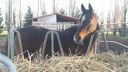

In [9]:
path = dataset
print(path)
im = Image.open(path/'cavalo/OIP-_0PoMJCRn51Al0YR3STdQgHaEK.jpeg')
im.to_thumb(128,128)

In [10]:
#doc(get_image_files)
#get_image_files??

In [11]:
fns = get_image_files(path)
fns

(#23359) [Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-3HBNkj_o-anjUwUEdgAGVQHaHa.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-ioKcCvEnYDS1rtvZ4LObiAHaFj.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-_k5JGFJdEOADeeI6S5OZLgHaEw.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-_CfAAHdwS_7kSIEuKo_LhQHaG7.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-UQxiz1yn0FMOKgP6uGgnMgHaE8.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-R6D2cCi4MrXf-DfG5IRmWQHaEX.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/Git/datasets/animais/train/esquilo/OIP-9DVo0BFRYn0jeLBzktc9GgHaFj.jpeg'),Path('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-

In [12]:
# #video 6, time 52min
# def splitter(df):
#     train = df.index[~df['is_valid']].tolist()
#     valid = df.index[ df['is_valid']].tolist()

In [13]:
animais = DataBlock(    
    blocks=(ImageBlock, CategoryBlock),  #MultiCategoryBlock
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # splitter (function)
    get_y=parent_label,
    item_tfms=Resize(256),  #center cropping(default), pad, squish, RandomResizedCrop(128, min_scale=0.35)
    batch_tfms=aug_transforms(size=128, mult=2)) #[*aug_transforms(size=(240,320)), Normalize.fram_stats(*imagenet_stats)]

In [14]:
#animais.summary(path)

In [15]:
dls = animais.dataloaders(path, bs=64)
dls.loss_func

/home/leandro/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


FlattenedLoss of CrossEntropyLoss()

In [43]:
dls.c

10

In [44]:
dls.vocab

['aranha', 'borboleta', 'canino', 'cavalo', 'elefante', 'esquilo', 'galinha', 'gato', 'ovelha', 'vaca']

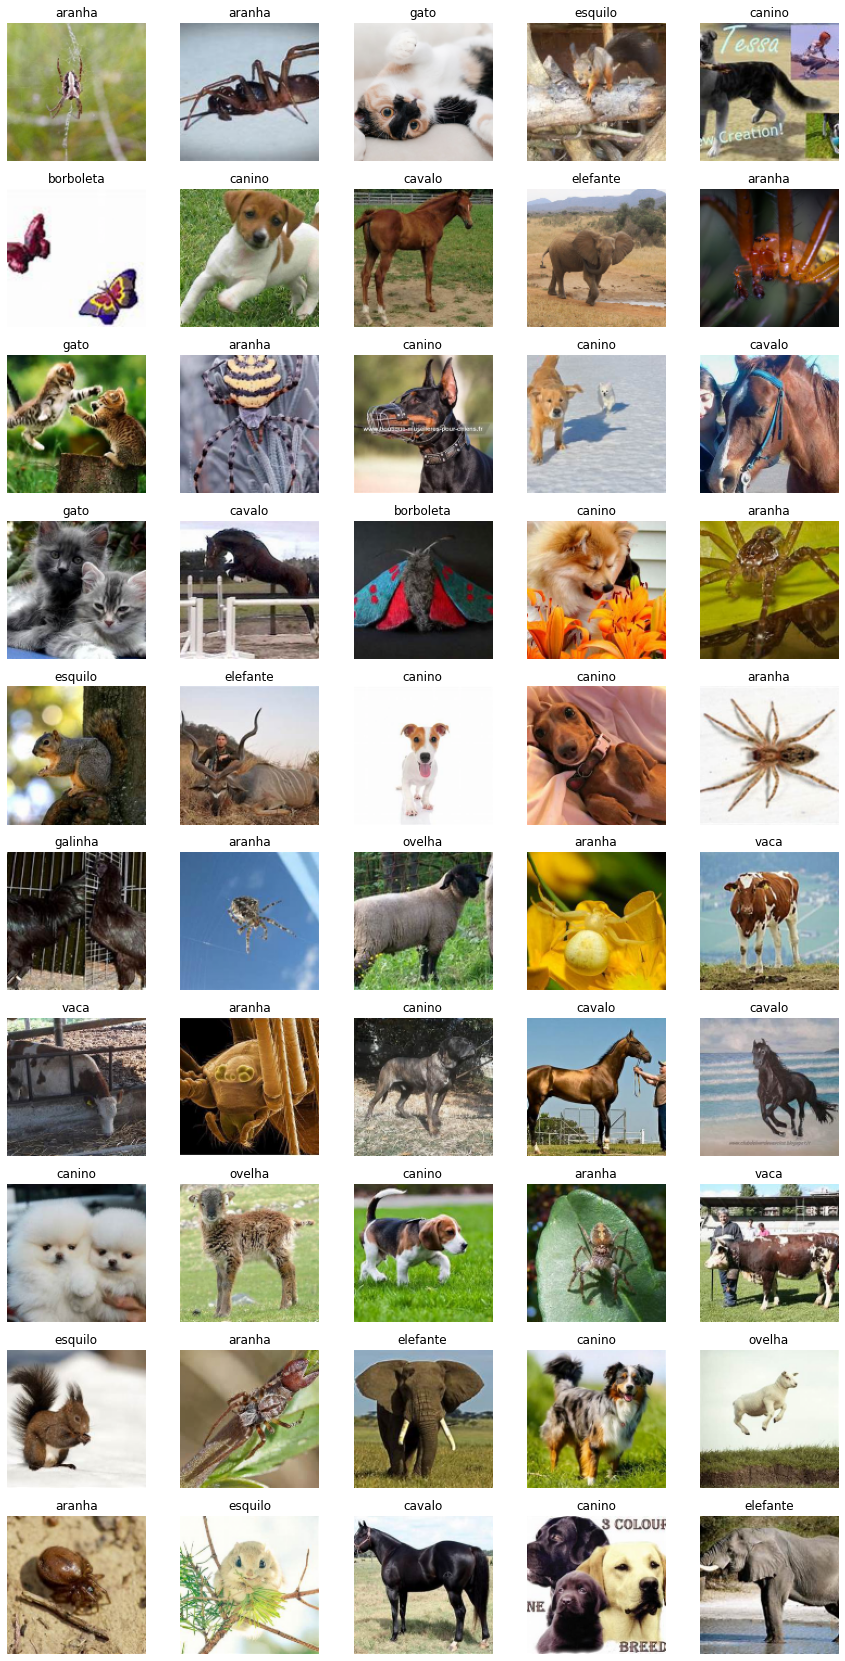

In [48]:
dls.valid.show_batch(max_n=50, nrows=10)

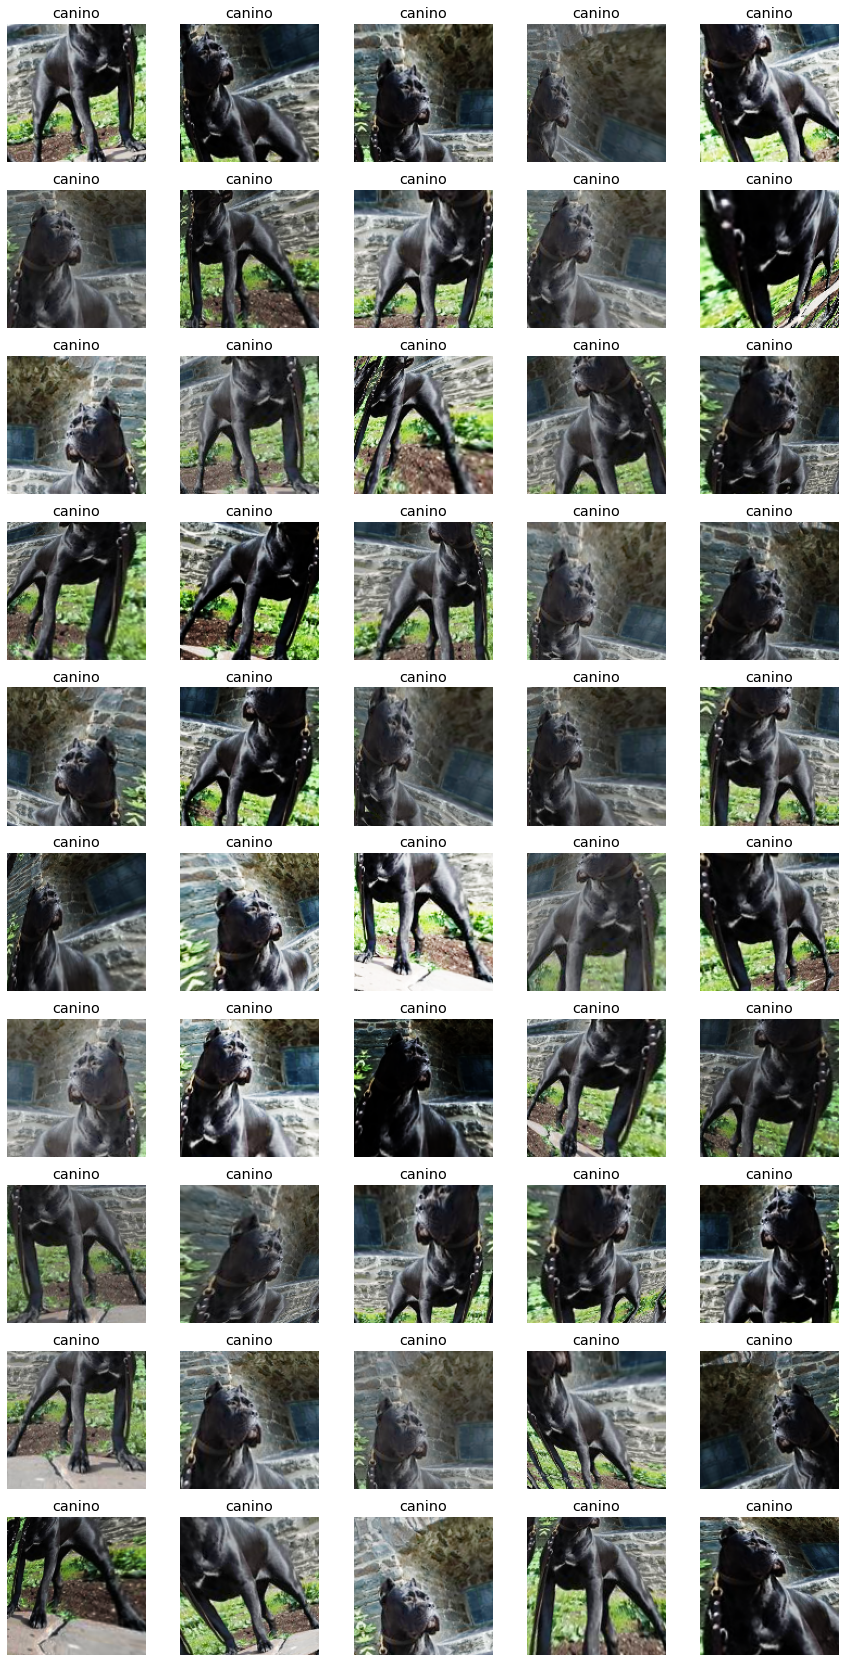

In [17]:
dls.train.show_batch(max_n=50, nrows=10, unique=True)

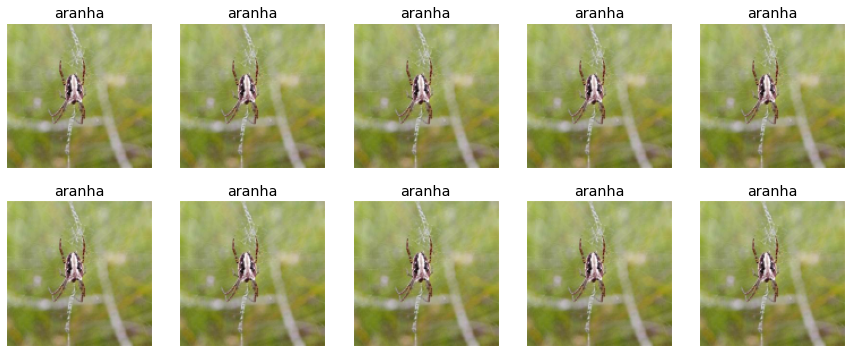

In [18]:
dls.valid.show_batch(max_n=10, nrows=2, unique=True)

In [20]:
x,y = dls.train.one_batch()

In [21]:
x[0], y[0]

(TensorImage([[[0.4778, 0.4778, 0.4778,  ..., 0.6300, 0.6335, 0.6411],
          [0.4778, 0.4778, 0.4778,  ..., 0.6360, 0.6375, 0.6430],
          [0.4778, 0.4778, 0.4773,  ..., 0.6387, 0.6403, 0.6464],
          ...,
          [0.4140, 0.4120, 0.4097,  ..., 0.4514, 0.4817, 0.4633],
          [0.4116, 0.4093, 0.4087,  ..., 0.4795, 0.4598, 0.4543],
          [0.4106, 0.4094, 0.4102,  ..., 0.4517, 0.4439, 0.4305]],
 
         [[0.4249, 0.4249, 0.4249,  ..., 0.5037, 0.5091, 0.5112],
          [0.4249, 0.4249, 0.4249,  ..., 0.5092, 0.5115, 0.5129],
          [0.4249, 0.4249, 0.4244,  ..., 0.5116, 0.5147, 0.5207],
          ...,
          [0.3494, 0.3473, 0.3448,  ..., 0.4005, 0.4289, 0.4181],
          [0.3469, 0.3443, 0.3437,  ..., 0.4258, 0.4145, 0.4142],
          [0.3457, 0.3445, 0.3454,  ..., 0.4061, 0.4035, 0.3952]],
 
         [[0.2743, 0.2743, 0.2763,  ..., 0.2706, 0.2714, 0.2736],
          [0.2743, 0.2743, 0.2760,  ..., 0.2781, 0.2766, 0.2758],
          [0.2743, 0.2743, 0.2750, 

In [22]:
learn = cnn_learner(dls, resnet18, metrics=accuracy).to_fp16() #metrics=partial(accuracy_multi, tresh=0.2)

SuggestedLRs(valley=0.0012022644514217973)

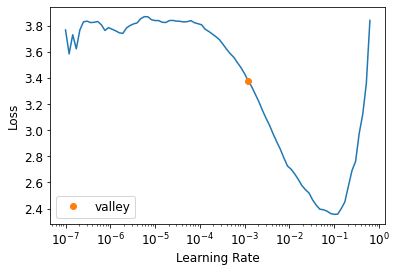

In [23]:
suggested_lr = learn.lr_find()
suggested_lr

In [24]:
#fine tune = 3 abaixo
learn.fine_tune(1, base_lr=0.001)  #freeze_epochs=3, base_lr=0.005

In [25]:
#learn.fit_one_cycle(1, lr_max=0.001)

SuggestedLRs(valley=4.365158383734524e-05)

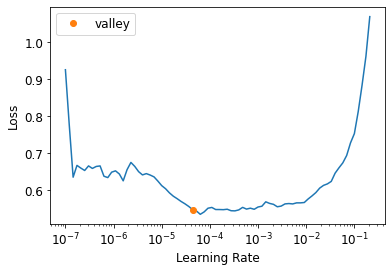

In [26]:
#suggested_lr2 = learn.lr_find()
#suggested_lr2

In [27]:
#learn.unfreeze
#learn.fit_one_cycle(2, lr_max=0.0006) #lr_max=slice(1e-6,1e-4)

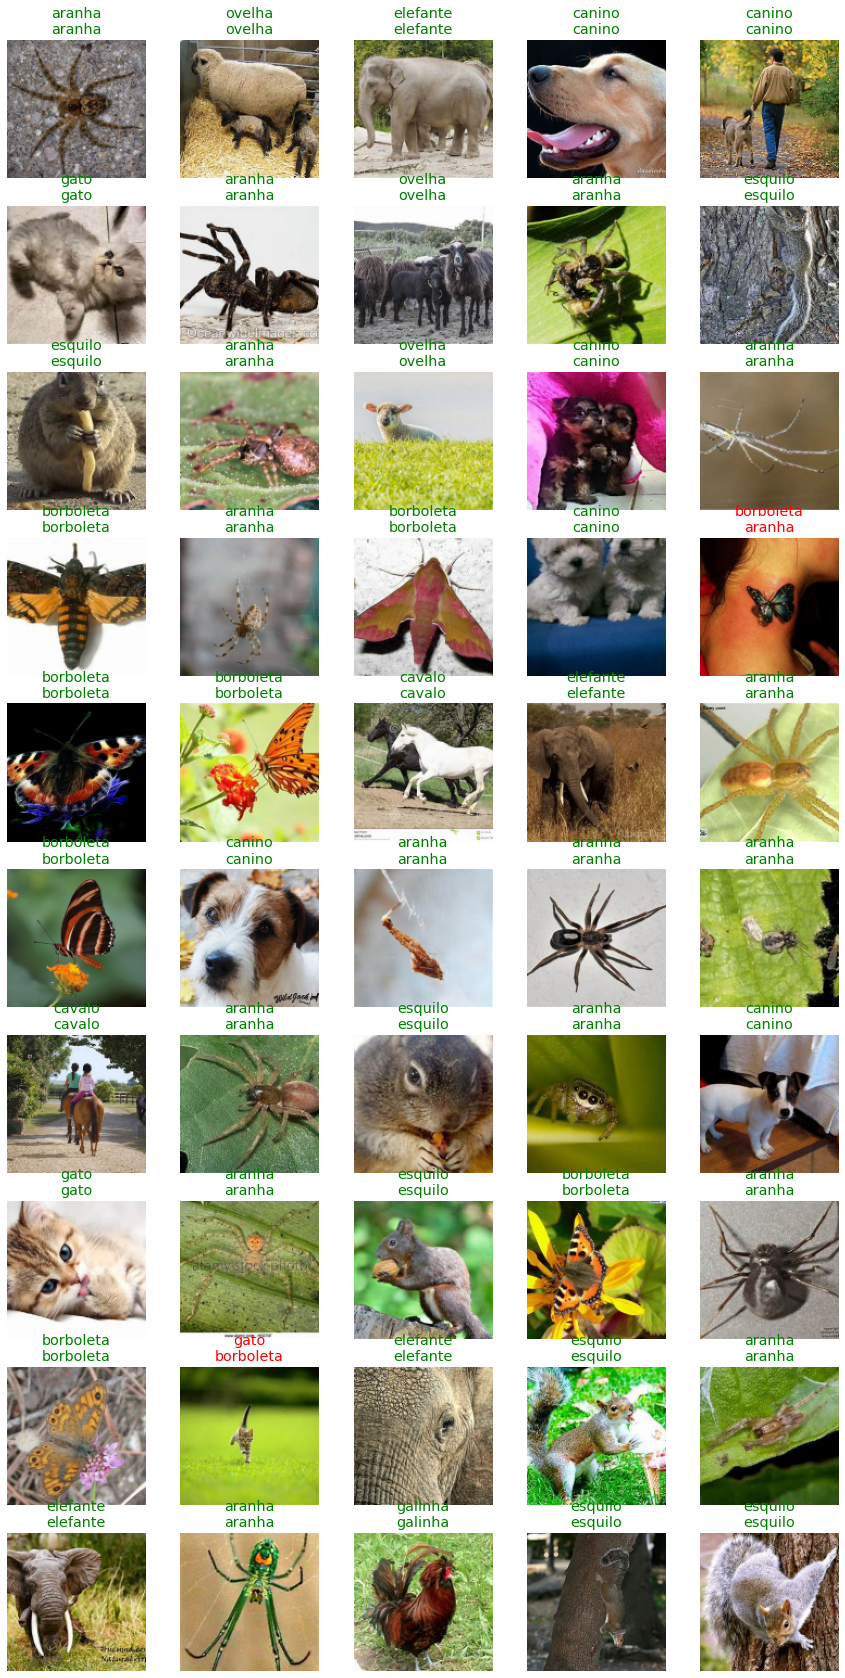

In [31]:
learn.show_results(max_n=50, nrows=10)

In [ ]:
doc(learn.fine_tune)

In [ ]:
learn.recorder.plot_loss()

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(1))

In [ ]:
learn.recorder.values[-1][0]

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(k=9, figsize=(15,11))

In [ ]:
#doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
#doc(interp.plot_top_losses)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
### completar final => for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#learn.export() #fname='/home/leandro/Documents/modelo_model.pkl'

In [ ]:
learn.save('/home/leandro/GoogleDrive/Leandro (MyDrive)/1-Projetos/1_5-FastAI/1_5_1-modelos/model_modelo')

In [ ]:
learn.model

In [ ]:
learn.summary()

In [ ]:
print(f'learn.lr: {learn.lr}')
print(f'learn.loss_func: {learn.loss_func}')

In [ ]:
#return the activations from the final layer (minibatch, classes)
x,y = dls.train.one_batch()
activs = learn.model(x)
activs.shape

In [ ]:
activs[0]

In [ ]:
# preds,_ = learn.get_preds(dl=[x,y])
# preds[0]